In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

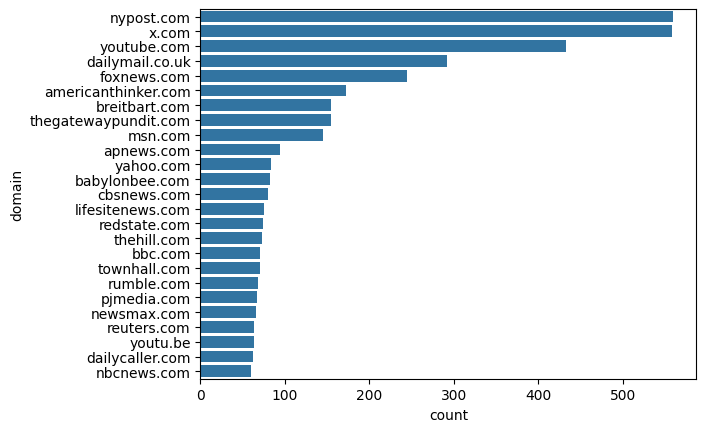

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

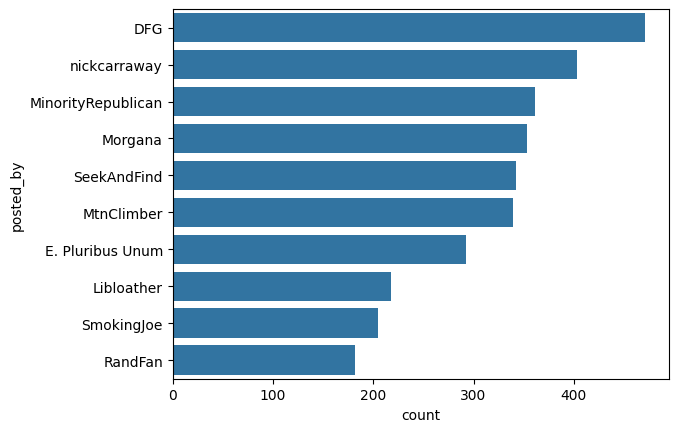

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_17600/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain                               \
                                         count unique                   top   
domain               posted_by                                                
americanthinker.com  DFG                     2      1   americanthinker.com   
                     MinorityRepublican      1      1   americanthinker.com   
                     MtnClimber            118      1   americanthinker.com   
                     SeekAndFind            31      1   americanthinker.com   
apnews.com           DFG                     3      1            apnews.com   
                     MinorityRepublican     10      1            apnews.com   
                     SeekAndFind             1      1            apnews.com   
                     E. Pluribus Unum       24      1            apnews.com   
                     Libloather              1      1            apnews.com   
                     RandFan                 1      1            apnews.com   
                     nickcarraway            1      1            apnews.com   
babylonbee.com       DFG                    20      1        babylonbee.com   
                     MinorityRepublican      1      1        babylonbee.com   
                     E. Pluribus Unum        2      1        babylonbee.com   
bbc.com              MinorityRepublican     10      1               bbc.com   
                     SeekAndFind             3      1               bbc.com   
                     E. Pluribus Unum       14      1               bbc.com   
                     Libloather              1      1               bbc.com   
                     nickcarraway            1      1               bbc.com   
                     Morgana                 1      1               bbc.com   
breitbart.com        DFG                    12      1         breitbart.com   
                     MinorityRepublican      6      1         breitbart.com   
                     MtnClimber              2      1         breitbart.com   
                     Morgana                27      1         breitbart.com   
                     SmokingJoe              5      1         breitbart.com   
cbsnews.com          DFG                     7      1           cbsnews.com   
                     MinorityRepublican      4      1           cbsnews.com   
                     SeekAndFind             1      1           cbsnews.com   
                     E. Pluribus Unum        7      1           cbsnews.com   
                     Libloather              5      1           cbsnews.com   
                     RandFan                 1      1           cbsnews.com   
                     nickcarraway            3      1           cbsnews.com   
                     Morgana                 1      1           cbsnews.com   
dailycaller.com      DFG                    34      1       dailycaller.com   
                     MtnClimber              2      1       dailycaller.com   
dailymail.co.uk      DFG                    37      1       dailymail.co.uk   
                     MinorityRepublican     40      1       dailymail.co.uk   
                     MtnClimber              1      1       dailymail.co.uk   
                     SeekAndFind             1      1       dailymail.co.uk   
                     E. Pluribus Unum        1      1       dailymail.co.uk   
                     RandFan                 4      1       dailymail.co.uk   
                     Morgana                68      1       dailymail.co.uk   
foxnews.com          DFG                     8      1           foxnews.com   
                     MinorityRepublican     26      1           foxnews.com   
                     MtnClimber              1      1           foxnews.com   
                     SeekAndFind             2      1           foxnews.com   
                     E. Pluribus Unum       16      1           foxnews.com   
                     Libloather             51      1           foxnews.com   
           

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_17600/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
New images from Guthrie ring cam,2026-02-10 21:52:47,298.0
"Bovino: Man shot dead in Minneapolis ""wanted to do maximum damage and massacre law enforcement",2026-01-25 03:04:28,243.0
President Trump says Maduro and his wife have been captured. A news conference will be held at 11 A.M,2026-01-03 14:17:40,209.0
BREAKING: Supreme Court Rules 6-3 Against Trump Tariffs,2026-02-20 19:13:10,204.0
Iran’s Supreme Leader Ayatollah Ali Khamenei was killed in an Israeli airstrike - his body recovered,2026-02-28 22:33:18,203.0
"Israel launches attack on Iran, blasts heard in Tehran",2026-02-28 12:45:22,197.0
January 2026 Snow Storm,2026-01-23 05:26:16,192.0
United States is finalizing a staggering $700 billion cash offer to buy Greenland outright from Denmark,2026-01-20 23:32:23,186.0
"Poet Renee Nicole Good, 37, named as Minneapolis woman shot dead by ICE agent as video captures grieving wife at the scene",2026-01-08 01:36:21,182.0
